In [1]:
from Postprocess_functions import *

Welcome to JupyROOT 6.26/10


In [2]:
import gmsh
import sys
import os
from os.path import exists
import subprocess
import numpy as np
import time
import ROOT
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from ROOT import TFile, TTree
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev,splprep
from scipy.interpolate import BSpline
import math
def Initialization_Mult(args):
    print('Initializations')
    gen=[]
    gen_file=[]
    NSGA_files=[]
    root_folder=[]
    pictures_folder=[]
    pictures_folder_pareto=[]
    pictures_folder_filter=[]
    pictures_folder_filter_shape=[]
    
    c=0
    for fol in args.folder:
        root_folder.append(fol)
        gen.append(args.generation[c])
        print(gen)
        folder_path=root_folder[c] # add path to ROOT/
        rf=os.listdir(folder_path)		# get all files in the folder
        NSGA_filenames = find_strings_containing_substring(rf, 'NSGAII_') # Get all root files
        print(rf)
        NSGA_filenames=sort_strings_by_int(NSGA_filenames)
        prefix = folder_path+'/'
        NSGA_files.append([prefix+s for s in NSGA_filenames])
        print(str(gen[c]))
        gen_file.append(folder_path+'/'+find_strings_containing_substring(rf, str(gen[c]))[0]) # Get last generation file or given gen.
        print('pictures/ROOT/'+root_folder[c]+'/Shape/')
        pictures_folder.append('pictures/ROOT/'+root_folder[c]+'/Shape/')
        print(pictures_folder)
        pictures_folder_pareto.append('pictures/ROOT/'+root_folder[c]+'/Pareto/')
        pictures_folder_filter.append('pictures/ROOT/'+root_folder[c]+'/Filter/')
        pictures_folder_filter_shape.append('pictures/ROOT/'+root_folder[c]+'/Filter/Shape_gen'+str(gen[c])+'/')

        create_folder(pictures_folder[c])  # Create required folders to store pictures
        create_folder(pictures_folder_pareto[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter_shape[c])  # Create required folders to store pictures
        c+=1
        print('### Initializations END')
    return gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape


In [3]:
# Fill the class with the required inputs:

class ArgValues:
    def __init__(self):
        self.folder = ["../NSGAIIData/2306/TileV0/"]
        #self.folder = "G11_objLC_Acte_YSym_SiMPmatch6mm_68Evts_Spline_23-02-09"
        #self.folder ="G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_68Evts_Spline_23-02-12"
        self.generation = [40,99,99,99]
        self.Ysym = [1,1,1,1]
        self.LYSOL = [1,0,1,1]
        self.save = 1
        self.Shape = 0
        self.ParetoFrontier = 0
        self.Filter = 1
        self.LaunchIndv = 0
args0=ArgValues()

In [4]:
gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape= Initialization_Mult(args0)

Initializations
[40]
['save_Acte_YSym_Spline_g16_230206.root', 'NSGAII_3.root', 'NSGAII_14.root', 'NSGAII_11.root', 'NSGAII_17.root', 'save_final_375mum_match3_NoYSym.root', 'NSGAII_2.root', 'NSGAII_0.root', 'save_last0323_g51.root', 'NSGAII_38.root', 'NSGAII_43.root', 'NSGAII_42.root', 'NSGAII_5.root', 'NSGAII_35.root', 'NSGAII_12.root', 'NSGAII_16.root', 'NSGAII_8.root', 'NSGAII_39.root', 'NSGAII_7.root', 'NSGAII_29.root', 'save145.root', 'NSGAII_26.root', 'NSGAII_13.root', 'NSGAII_4.root', 'save58.root', 'save_96_Actev2_030223.root', 'NSGAII_18.root', 'NSGAII_27.root', 'NSGAII_28.root', 'NSGAII_40.root', 'save_0130.root', 'NSGAII_9.root', 'NSGAII_10.root', 'save_Acte_SiPMmatch_xlimissue_0208.root', 'NSGAII_31.root', 'NSGAII_20.root', 'NSGAII_37.root', 'NSGAII_25.root', 'save_gen126_SiPMincr200_SiPMmatch3_NoYSym_GC11.root', 'NSGAII_32.root', 'NSGAII_24.root', 'NSGAII_30.root', 'NSGAII_36.root', 'NSGAII_22.root', 'save_gen9_SiMPmatch3_SiMP6mm_NoYSym.root', 'NSGAII_23.root', 'save_gen7

### Pareto Frontier
Generation:  0
The number of vars per indv is :14
The number indv is :200
The number of vars per indv is :14
The number indv is :200


(25.82033034822294, 578.5820741399878)

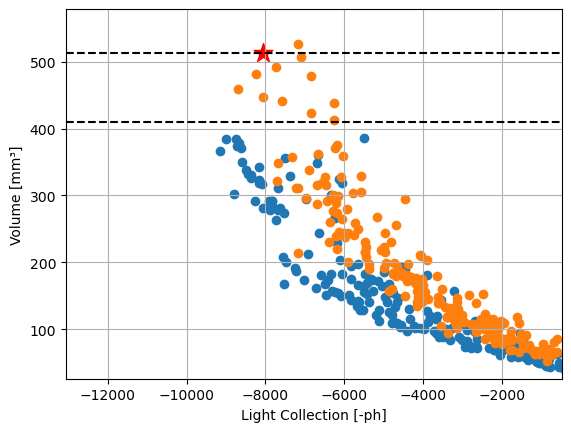

In [5]:
print('### Pareto Frontier')
ims=[]
fig1, ax1 = plt.subplots()
plt.grid()
#plt.xlim([-20000, -2000])
#plt.ylim([200, 900])
# specifying horizontal line type
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--')
plt.axhline(y = 2.4*3*28.5*2, color = 'k', linestyle = '--')
plt.axhline(y = 3.75*3*28.5*2, color = 'k', linestyle = '--')
g=0
#try:
print("Generation: ",g )
# Get required input for plotting the crystal shapes

ff=0
nn= len(NSGA_files[ff])-1
num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(NSGA_files[ff][40])
ax1.scatter(obj1,obj2)
nn= 0
num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(NSGA_files[ff][10])
ax1.scatter(obj1,obj2)
ax1.scatter([-8059],[513], color='red', marker='*', s=200)


ax1.set_xlabel('Light Collection [-ph]')
ax1.set_ylabel('Volume [mm³]')
ax1.set_xlim([min(obj1)*1.5, max(obj1)*0.8])
ax1.set_ylim([min(obj2)*0.5, max(obj2)*1.1])

### Pareto Frontier
Generation:  0
The number of vars per indv is :14
The number indv is :200


(19.840967023855548, 424.9036011208415)

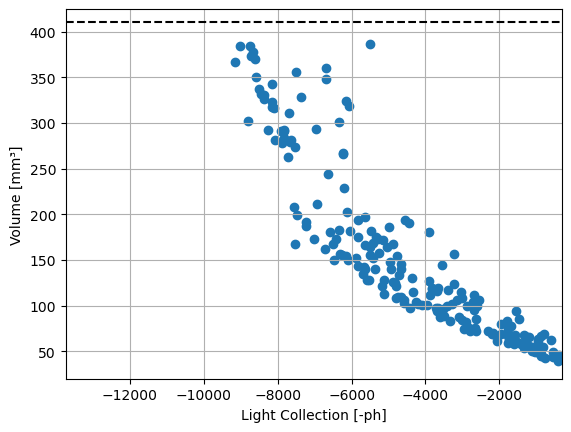

In [6]:
print('### Pareto Frontier')
ims=[]
fig1, ax1 = plt.subplots()
plt.grid()
#plt.xlim([-20000, -2000])
#plt.ylim([200, 900])
# specifying horizontal line type
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--')
plt.axhline(y = 2.4*3*28.5*2, color = 'k', linestyle = '--')
plt.axhline(y = 3.75*3*28.5*2, color = 'k', linestyle = '--')
g=0
#try:
print("Generation: ",g )
# Get required input for plotting the crystal shapes

num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(NSGA_files[0][40])
ax1.scatter(obj1,obj2)
#ax1.scatter(obj1,obj2)
ax1.scatter([-8059],[513], color='red', marker='*', s=200)


ax1.set_xlabel('Light Collection [-ph]')
ax1.set_ylabel('Volume [mm³]')
ax1.set_xlim([min(obj1)*1.5, max(obj1)*0.8])
ax1.set_ylim([min(obj2)*0.5, max(obj2)*1.1])

### Filter - PF
The number of vars per indv is :14
The number indv is :200
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 181, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


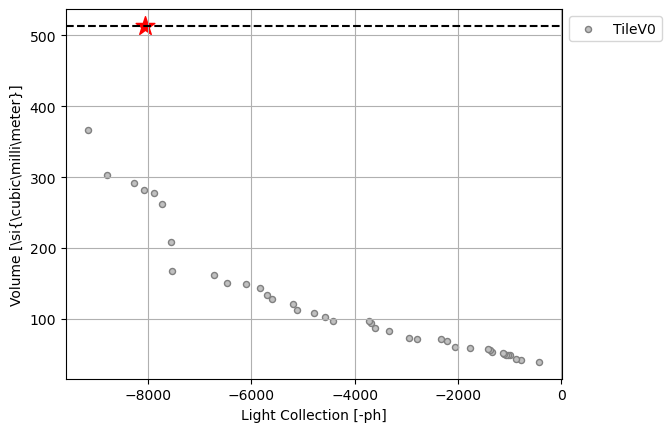

<Figure size 640x480 with 0 Axes>

In [7]:
	##############
	### FILTER ###
	##############
print('### Filter - PF')
fig1, ax1 = plt.subplots()

def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o'):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
    print(idxf)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=19, c=colorf, edgecolor=colore, marker=mk,label=lab)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)

plt.grid()
ax1.set_xlabel('Light Collection [-ph]')
ax1.set_ylabel('Volume [\\si{\cubic\milli\meter}]')
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--')
#plt.axhline(y = 2.4*3*28.5*2, color = 'k', linestyle = '--')
#plt.axhline(y = 3.75*3*28.5*2, color = 'k', linestyle = '--')
plt_filtered_PF(fig1,ax1,gen_file[0],'silver','gray',lab='TileV0')

#ax1.scatter([-8059],[513],s=30, c='white', edgecolor='black', marker='o',linewidths=3)
ax1.legend(bbox_to_anchor=(1.0, 1))
ax1.scatter([-8059],[513], color='red', marker='*', s=200)

plt.show()
plt.draw()
fig1.savefig("FilteredParetoFronts.pdf")


In [8]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    print("VARS:")
    print(vars_tuple[original_idx])


print(gen_file)
crystalcoords_mult(gen_file,args0,0,300)


['../NSGAIIData/2306/TileV0//NSGAII_40.root']
The number of vars per indv is :14
The number indv is :200
### Objective values:  302.67814520796964   38   -8793.412698412698   -29.052023866377134
VARS:
[9.792581998156047, 0.8216155561660522, 0.6215260291969559, 1.446845755487409, 0.5446244702538855, 0.6493808001053373, 0.5138504117050802, 1.6298099706621336, 1.0289049066018898, 4.149018452016884, 3.4119471482094466, 3.999740648262698, 3.6745526034502465, 1.979488475250832]


['../NSGAIIData/2306/TileV0//NSGAII_40.root']
The number of vars per indv is :14
The number indv is :200
### Objective values:  366.9861671324421   39   -9152.396825396825   -24.939350975847013
VARS:
[9.987792119306585, 0.8865640658376187, 0.7386034433928748, 1.299498420786614, 1.392728741478071, 1.3461748097627375, 1.06330190372356, 1.7149511749970774, 1.2850666698262043, 4.035000557231265, 3.670419053881156, 5.0, 5.0, 2.6686677397436394]
NoYSym
LYSOL


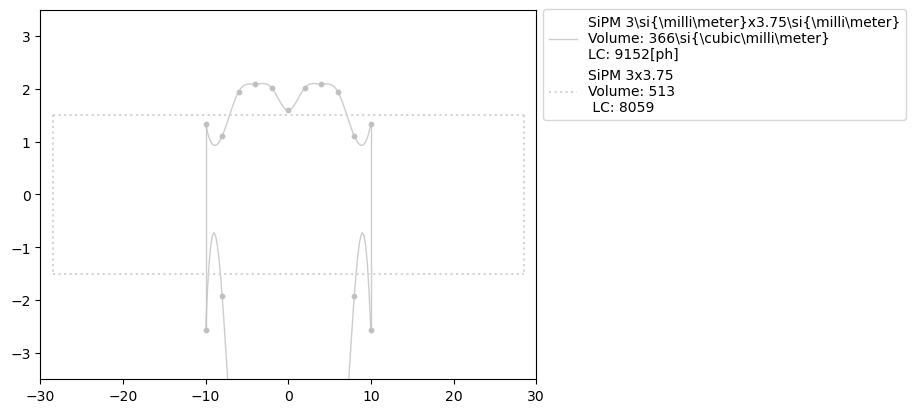

<Figure size 640x480 with 0 Axes>

In [8]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    print("VARS:")
    print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
print(gen_file)
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,540)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))
# Original design 766 ph
plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LYSOShapes.pdf")

The number of vars per indv is :14
The number indv is :200
### Objective values:  302.67814520796964   38   -8793.412698412698   -29.052023866377134
NoYSym
LYSOL
The number of vars per indv is :14
The number indv is :200
### Objective values:  208.41333672790833   33   -7550.8   -36.22992711765784
NoYSym
LYSOL


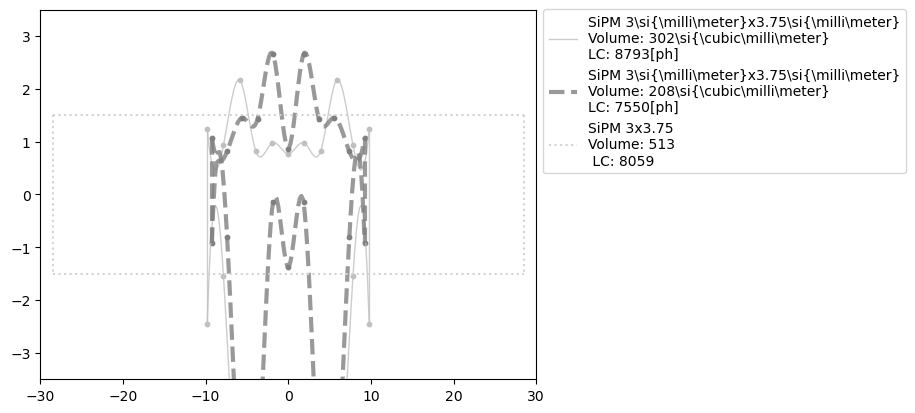

<Figure size 640x480 with 0 Axes>

In [9]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,300)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,200)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='--', lnwidth=3, alph=0.8)
leg.append(legend_text)

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LYSOShapes_LowerThan513.pdf")

The number of vars per indv is :14
The number indv is :200
### Objective values:  366.9861671324421   39   -9152.396825396825   -24.939350975847013
NoYSym
LYSOL
The number of vars per indv is :14
The number indv is :200
### Objective values:  366.9861671324421   39   -9152.396825396825   -24.939350975847013
NoYSym
LYSOL


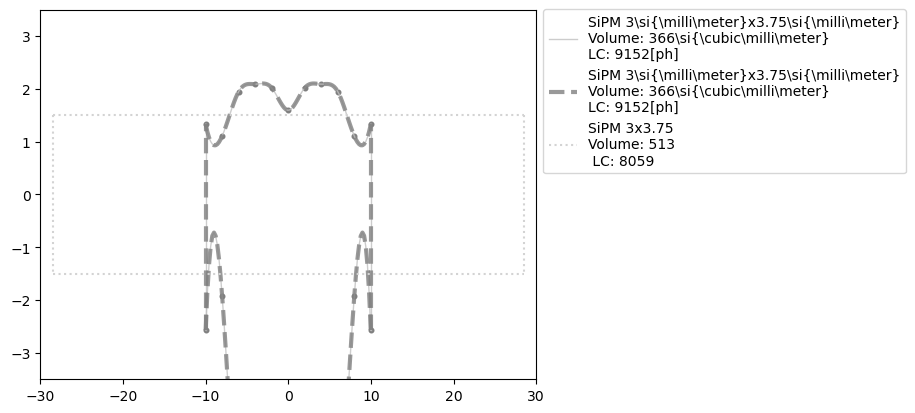

FileNotFoundError: [Errno 2] No such file or directory: 'LatexPics/LYSOShapes_HigherThan513.pdf'

<Figure size 640x480 with 0 Axes>

In [10]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,600)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,700)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='--', lnwidth=3, alph=0.8)
leg.append(legend_text)

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOShapes_HigherThan513.pdf")

The number of vars per indv is :14
The number indv is :200
### Objective values:  208.41333672790833   33   -7550.8   -36.22992711765784
NoYSym
LYSOL


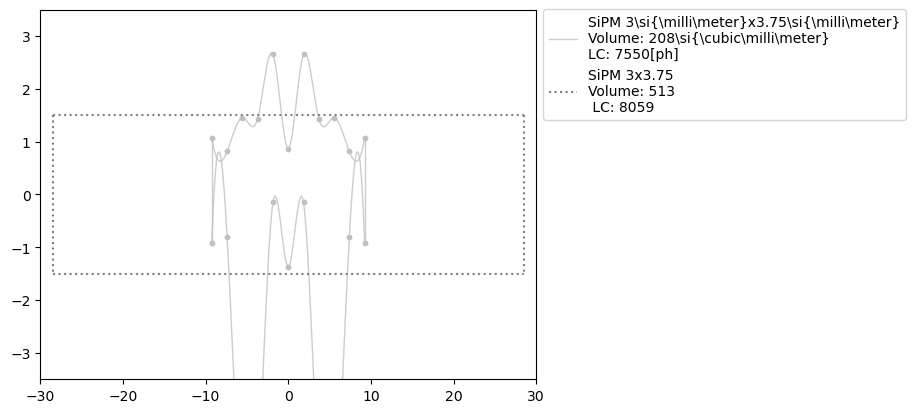

FileNotFoundError: [Errno 2] No such file or directory: 'LatexPics/LYSOShapes_200.pdf'

<Figure size 640x480 with 0 Axes>

In [11]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
Volv=[200,300,400,600,700,800]
for Vol in Volv:
    fig1, ax1 = plt.subplots()
    xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,Vol)
    Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
               lnstyle='-', lnwidth=1, alph=0.8)

    Plt_DefaultCrystal(fig1,ax1,colori='gray',ls='dotted')

    # Create the legend with the plot name, volume, and light collection
    #legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
    #plt.legend([leg], loc='upper right')
    ax1.legend(bbox_to_anchor=(1., 1.02))

    plt.show()
    plt.draw()
    fig1.tight_layout()
    fig1.savefig("LatexPics/LYSOShapes_"+str(Vol)+".pdf")

The number of vars per indv is :14
The number indv is :200
### Objective values:  366.9861671324421   39   -9152.396825396825   -24.939350975847013
NoYSym
LYSOL


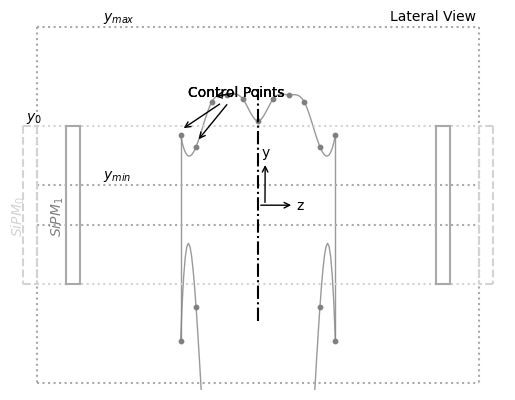

FileNotFoundError: [Errno 2] No such file or directory: 'LatexPics/LYSOSplineSchematic.pdf'

<Figure size 640x480 with 0 Axes>

In [12]:

fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,513)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

ax1.plot([-28.5,28.5], [0.375,0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-0.375,-0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [3.375,3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,-28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([28.5,28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')


L1=23
x1=28.5*3/L1/2
xs=1.5
Ls=L1+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

plt.xlim((-32,32))
L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([0,0], [-2.2,2.2],color='black',linestyle='dashdot')

plt.axis('off')

#ax1.annotate('x', xy=(0, 0), xytext=(5, 0),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('$y_{min}$', xy=(-26, 0.25), xytext=(-20, 0.5))
ax1.annotate('$y_{max}$', xy=(-26, 0.25), xytext=(-20, 3.5))
ax1.annotate('$y_{0}$', xy=(-26, 0.25), xytext=(-30, 1.6))
ax1.annotate('$SiPM_{0}$', xy=(-26, 0.25), xytext=(-32, -0.5),rotation=90, c='lightgray')
ax1.annotate('$SiPM_{1}$', xy=(-26, 0.25), xytext=(-27, -0.5),rotation=90, c='gray')

ax1.annotate('Lateral View', xy=(-26, 0.25), xytext=(17, 3.5), c='black')


ax1.annotate('Control Points', xy=(xtop[0]+0.1, ytop[0]+0.1), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('Control Points', xy=([xtop[1]+0.1, ytop[1]+0.1]), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('Control Points', xy=([xtop[2]+0.1, ytop[2]+0.1]), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')

ax1.annotate('z', xy=(0,0), xytext=(5,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('y', xy=(0.9,0), xytext=(0.4,1),
            arrowprops={'arrowstyle': '<-'}, va='center')
#ax1.arrow(0, 0, 3, 0, head_width=0.2)

plt.show()
plt.draw()

fig1.tight_layout()
fig1.savefig("LatexPics/LYSOSplineSchematic.pdf")

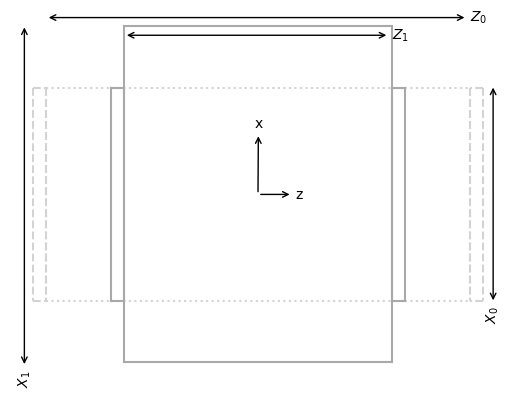

FileNotFoundError: [Errno 2] No such file or directory: 'LatexPics/LYSOAreaSchematic.pdf'

<Figure size 640x480 with 0 Axes>

In [13]:
fig1, ax1 = plt.subplots()

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.plot([-L1,L1], [x1,x1],color='darkgray',linestyle='-')
ax1.plot([-L1,L1], [-x1,-x1],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [x1,-x1],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [x1,-x1],color='darkgray',linestyle='-')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.annotate('$Z_1$', xy=(-L1,xs*1.5), xytext=(+L1,xs*1.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.annotate('z', xy=(0,0), xytext=(5,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('x', xy=(0.,0), xytext=(-0.5,1),
            arrowprops={'arrowstyle': '<-'}, va='center')

ax1.annotate('$Z_0$', xy=(-28.5,2.5), xytext=(+28.5,2.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.annotate('$X_0$', xy=(+31.6,1.55), xytext=(+30.5,-1.7),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)
ax1.annotate('$X_1$', xy=(-31.4,2.4), xytext=(-32.5,-2.6),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)

plt.axis('off')

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOAreaSchematic.pdf")

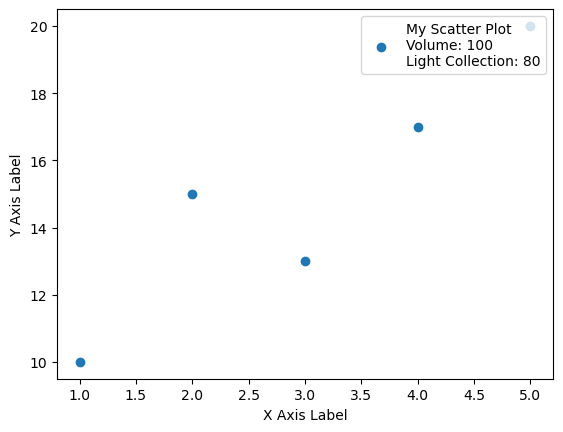

In [14]:
import matplotlib.pyplot as plt

# Generate some data for the scatter plot
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 17, 20]

# Create the scatter plot
plt.scatter(x, y)

# Add labels to the axes
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Create the legend with the plot name, volume, and light collection
legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
plt.legend([legend_text], loc='upper right')

# Show the plot
plt.show()

In [15]:
	if(args.save==1):
			imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
			save_name=pictures_folder_filter+imagename
			print(save_name)
			plt.savefig(save_name, format='png', dpi=300, bbox_inches='tight')
	"""except:
		imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
		print("### ERROR: ",pictures_folder_filter+imagename)*/		"""

NameError: name 'args' is not defined

In [ ]:
import matplotlib.pyplot as plt

def plot_with_error_bars(x, y, xerr):
    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
    ax.set_xlabel("X data")
    ax.set_ylabel("Y data")
    plt.show()
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
xerr = [0.5, 0.4, 0.3, 0.2]

plot_with_error_bars(x, y, xerr)